# Data Preprocessing Regression

## Import libraries

In [1]:
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## Load the dataset

In [2]:
# User selects the dataset
# Options: "diabetes", "california_housing"
selected_dataset = "diabetes"  # Change this variable to choose a dataset

# Load the selected dataset
if selected_dataset == "diabetes":
    data = load_diabetes(as_frame=True)
elif selected_dataset == "california_housing":
    data = fetch_california_housing(as_frame=True)
else:
    raise ValueError("Invalid dataset selected. Choose 'diabetes' or 'california_housing'.")

X = data.data
y = data.target

## Handle missing values

In [3]:
if X.isnull().any().any():
    print("Found missing values. Imputing with mean...")
    X.fillna(X.mean(), inplace=True)
else:
    print("No missing values found.")

No missing values found.


## Data overview

In [7]:
print("Dataset Overview:")
display(X.head())
print("_"*120)
print("\nDataset Info:")
print(X.info())
print("_"*120)
print(f"\nNumber of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

Dataset Overview:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


________________________________________________________________________________________________________________________

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
________________________________________________________________________________________________________________________

Number of samples: 442
Number of features: 10


## Correlation heatmap

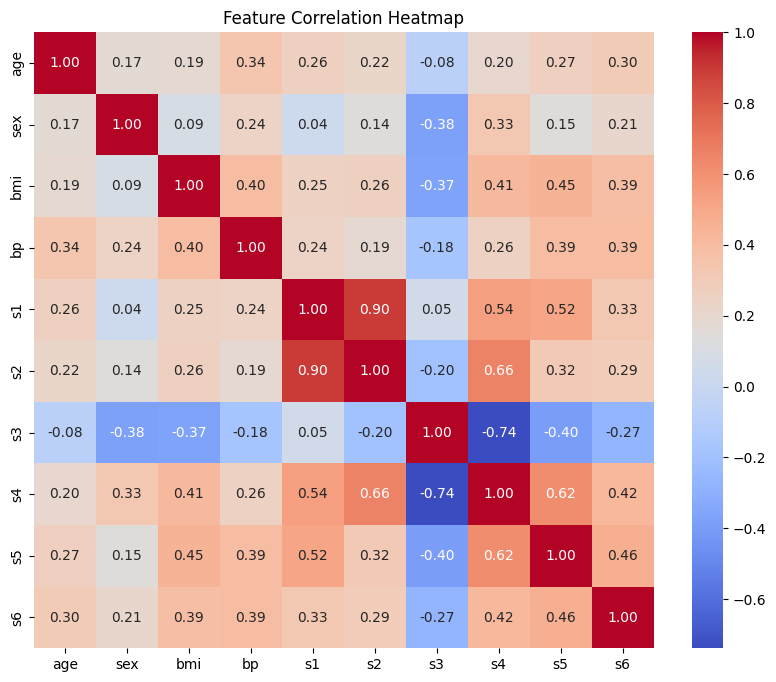

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Standardize dataset

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Save data

In [10]:
preprocessed_data = {
    "X_scaled": X_scaled,
    "X_raw": X,
    "y": y
}

with open("preprocessed_data.pkl", "wb") as f:
    pickle.dump(preprocessed_data, f)

print("Preprocessed data saved.")

Preprocessed data saved.
